# Import and Install Necessary Libraries

In [25]:
!pip install mlflow

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [26]:
# Common imports
import numpy as np
import os
from urllib.parse import urlparse

# ML flow imports
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from tqdm.auto import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
from sklearn.metrics import auc


# Define Necessary Functions

In [27]:
# Function to load stored splitted data
def load_split_data(file_path):
    return pd.read_csv(file_path)

# Function to fit models
def fit_model(train_data, y_train, model_name='logistic_regression'):
    if model_name == 'logistic_regression':
        model = Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english')),
            ('clf', LogisticRegression(random_state=42))
        ])
    elif model_name == 'random_forest':
        model = Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english')),
            ('clf', RandomForestClassifier(random_state=42))
        ])
    elif model_name == 'svm':
        model = Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english')),
            ('clf', SVC())
        ])
    else:
        raise ValueError("Model name not recognized. Choose 'logistic_regression', 'random_forest', or 'svm'")

    model.fit(train_data, y_train)
    return model

# Function to calculate scores of differet models
def score_model(model, data, y_true):
    y_pred = model.predict(data)
    return accuracy_score(y_true, y_pred)

# Function for model evaluation
def evaluate_model(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Function for model validation
def validate_model(model, train_data, y_train, validation_data, y_val):
    print("Train score:", score_model(model, train_data, y_train))
    print("Validation score:", score_model(model, validation_data, y_val))
    
# Function for Area under Precision_Recall Curve
def eval_metrics(actual, pred):
    prec, recall,_ = precision_recall_curve(actual, pred)
    aucpr = auc(recall, prec)
    return aucpr

# Model Selection from 3 benchmarked models

In [28]:
model_names = ['logistic_regression', 'random_forest', 'svm']

In [29]:
# Load data
train_data = load_split_data(r'Data/Splited_Data_Seed_42/train.csv')
validation_data = load_split_data(r'Data/Splited_Data_Seed_42/validation.csv')
test_data = load_split_data(r'Data/Splited_Data_Seed_42/test.csv')


In [30]:
X_train = train_data['text']
y_train = train_data['spam']
X_val = validation_data['text']
y_val = validation_data['spam']
X_test = test_data['text']
y_test = test_data['spam']

## Training and evaluation

Training Models:   0%|          | 0/3 [00:00<?, ?it/s]


Training with logistic_regression:
Train score: 0.9949803579223047
Validation score: 0.9825378346915018
For training.

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3504
           1       1.00      0.98      0.99      1078

    accuracy                           0.99      4582
   macro avg       1.00      0.99      0.99      4582
weighted avg       0.99      0.99      0.99      4582



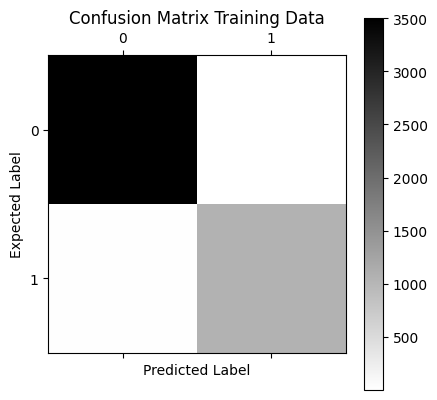

For validation.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       645
           1       1.00      0.93      0.96       214

    accuracy                           0.98       859
   macro avg       0.99      0.97      0.98       859
weighted avg       0.98      0.98      0.98       859



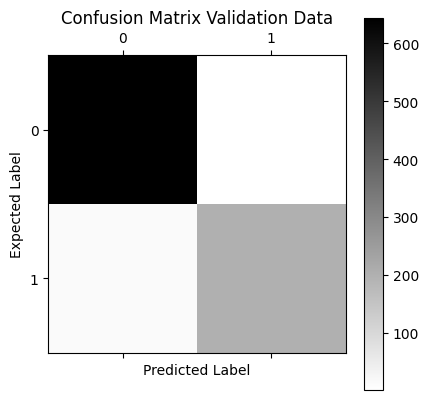

Training Models:  33%|███▎      | 1/3 [00:03<00:06,  3.47s/it]


Training with random_forest:
Train score: 1.0
Validation score: 0.9790454016298021
For training.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3504
           1       1.00      1.00      1.00      1078

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



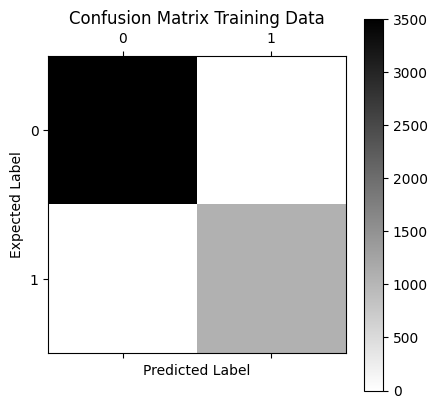

For validation.

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       645
           1       1.00      0.92      0.96       214

    accuracy                           0.98       859
   macro avg       0.99      0.96      0.97       859
weighted avg       0.98      0.98      0.98       859



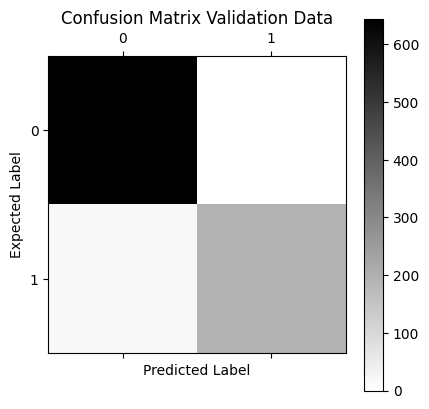

Training Models:  67%|██████▋   | 2/3 [00:16<00:08,  8.92s/it]


Training with svm:
Train score: 1.0
Validation score: 0.9871944121071012
For training.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3504
           1       1.00      1.00      1.00      1078

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



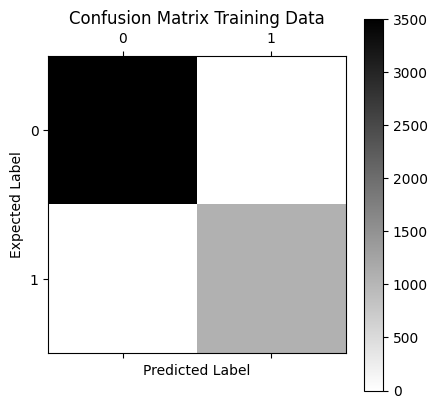

For validation.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       645
           1       1.00      0.95      0.97       214

    accuracy                           0.99       859
   macro avg       0.99      0.98      0.98       859
weighted avg       0.99      0.99      0.99       859



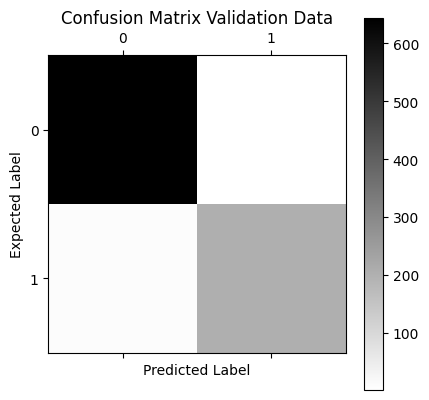

Training Models: 100%|██████████| 3/3 [00:44<00:00, 14.69s/it]


In [31]:
# Training and evaluation
for model_name in tqdm(model_names, desc="Training Models"):
    print(f"\nTraining with {model_name}:")
    model = fit_model(X_train, y_train, model_name)

    # Score on train and validation
    validate_model(model, X_train, y_train, X_val, y_val)

    # Evaluate on train and validation
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    print("For training.\n")
    evaluate_model(y_train, y_pred_train)
    plt.matshow(confusion_matrix(y_train, y_pred_train),
            cmap=plt.cm.binary,
            interpolation='nearest')
    plt.title('Confusion Matrix Training Data')
    plt.colorbar()
    plt.ylabel('Expected Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print("For validation.\n")
    evaluate_model(y_val, y_pred_val)
    plt.matshow(confusion_matrix(y_val, y_pred_val),
            cmap=plt.cm.binary,
            interpolation='nearest')
    plt.title('Confusion Matrix Validation Data')
    plt.colorbar()
    plt.ylabel('Expected Label')
    plt.xlabel('Predicted Label')
    plt.show()

## Tracking the Models using mlflow and calculate Area under Precision_Recall Curve

In [36]:
# ML_Flow Tracking
for model_name in tqdm(model_names, desc="Model Tracking Using mlflow"):

    with mlflow.start_run():
        Model=fit_model(X_train, y_train, model_name)

        predicted_qualities = Model.predict(X_val)

        aucpr = eval_metrics(y_val, predicted_qualities)

        print(model_name +" Classifier model (Area under Precision_Recall Curve={:f}):".format(aucpr))

        mlflow.log_param("Area under Precision Recall Curve", aucpr)


        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model regi
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(Model, "model", registered_model_name=model_name)
        else:
            mlflow.sklearn.log_model(Model, "model")

Model Tracking Using mlflow:   0%|          | 0/3 [00:00<?, ?it/s]

logistic_regression Classifier model (Area under Precision_Recall Curve=0.972951):


Model Tracking Using mlflow:  33%|███▎      | 1/3 [00:05<00:11,  5.72s/it]

random_forest Classifier model (Area under Precision_Recall Curve=0.968421):


Model Tracking Using mlflow:  67%|██████▋   | 2/3 [00:20<00:11, 11.20s/it]

svm Classifier model (Area under Precision_Recall Curve=0.980017):


Model Tracking Using mlflow: 100%|██████████| 3/3 [00:35<00:00, 11.94s/it]


# Based on Recall and Precission Logistic Regression is the best out of 3 benchmarked models before parameter tuning. Also SVM and Random Forest model may overfit the data as accuracy score in training data is 1 for both the models.

# Tune hyperparameters of Logistic Regression model

In [37]:
LR_model = Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english')),
            ('clf', LogisticRegression(random_state=42))
        ])

LR_model_params =  {
        'tfidf__max_df': [0.5, 0.75],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__C': [0.1, 1, 10]
    }

In [38]:
grid_search = GridSearchCV(LR_model, LR_model_params, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train )

print(f"Best parameters for LR_model :")
print(grid_search.best_params_)

tuned_LR_model=grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for LR_model :
{'clf__C': 10, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 1)}


## Classification report on Test Data for Tuned Logistic Regression Model

Classification Report for Tuned_LR_Model:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       211
           1       0.99      0.96      0.97        76

    accuracy                           0.99       287
   macro avg       0.99      0.98      0.98       287
weighted avg       0.99      0.99      0.99       287




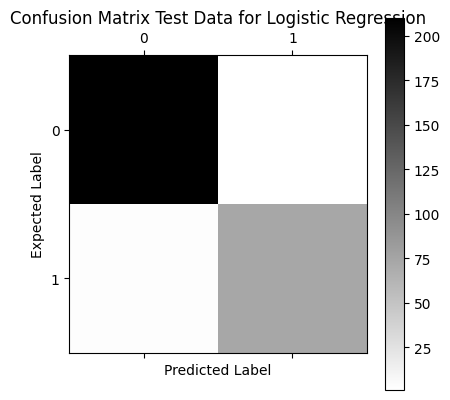

In [39]:
y_pred = tuned_LR_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(f"Classification Report for Tuned_LR_Model:\n{report}\n")
plt.matshow(confusion_matrix(y_test, y_pred),
            cmap=plt.cm.binary,
            interpolation='nearest')
plt.title('Confusion Matrix Test Data for Logistic Regression')
plt.colorbar()
plt.ylabel('Expected Label')
plt.xlabel('Predicted Label')
plt.show()